In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 4.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

### Motor Model
<center><img src='https://drive.google.com/uc?id=1u3JpghL6rIu7oi5d1Qfbr8LRbU9CyaLp'></img></center>

\begin{align}
J \ddot{\theta} + b \dot{\theta} &= K \cdot i \\
L \frac{di}{dt} + R \cdot i &= V - K \dot{\theta}
\end{align}
$$ $$
\begin{align}
(J \cdot s^2 + b \cdot s) \cdot \Theta(s) &= K \cdot I(s) \\
(L \cdot s + R) \cdot I(s) &= V(s) - K \cdot s \cdot \Theta(s)
\end{align}
$$ $$
$$G(s) = \frac{s \cdot \Theta(s)}{V(s)} = \frac{K}{(J\cdot s+b)(L\cdot s+R)+K^2}$$

### PID Controller
  <center><img src='https://drive.google.com/uc?id=1x_XbUEPYWMI-WNG3vEYoZM2iDZYY-2lG'></img></center>

  $$ C(s) = K_{p} + \frac {K_{i}} {s} + K_{d}s = \frac{K_{d}s^2 + K_{p}s + K_{i}} {s} $$


> Controller performance specification

* Rise time < 0.04 s
* %OS < 10%
* Steady-state error ~ 0

RiseTime 0.03
SettlingTime 0.09
SettlingMin 0.91
SettlingMax 1.02
Overshoot 2.07
Undershoot 0.00
Peak 1.02
PeakTime 0.08
SteadyStateValue 1.00


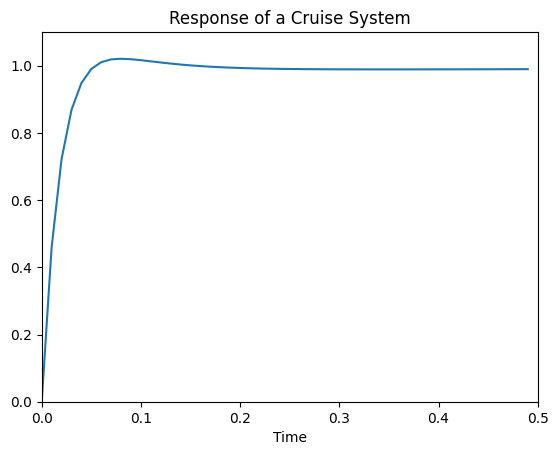

In [50]:
J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5
s = ctl.tf([1,0],[1])
G = K/((J*s+b)*(L*s+R)+K**2)

Kp = 500
Ki = 300
Kd = 30
C = Kp + Ki/s + Kd*s
sys_cl = ctl.feedback(C*G,1)

t,y = ctl.step_response(sys_cl,np.arange(0,0.5,0.01))
plt.plot(t,y)
plt.xlabel('Time')
plt.title('Response of a Cruise System')
plt.axis([0, 0.5, 0, 1.1])

info = ctl.step_info(sys_cl)
for item in info:
  print(item,format(info[item],'.2f'))
